<div style="text-align: right">hidekuno@gmail.com<br>2021-04-15</div> 

# SICP Picture Language
  Implemented in python with reference to https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-15.html#%_sec_2.2.4

### Functions using matplot

In [1]:
import matplotlib.pyplot as plt
from math import cos
from math import sin
from math import pi

def draw_init():
    plt.axes().set_aspect('equal')
    plt.ylim([1, 0])
    plt.axis('off')

def draw_line(s,e):
    plt.plot([xcor_vect(s), xcor_vect(e)], [ycor_vect(s), ycor_vect(e)], 'black',linewidth=0.8)

###  Constructor and Selector of Frame
$$
\mathrm{MakeFrame}(origin,edge1, edge2) =
\mathrm{MakeFrame}(MakeVect(x_1,y_1),MakeVect(x_2,y_2), MakeVect(x_3,y_3))
$$

In [2]:
def make_frame(origin, edge1, edge2): return (origin, edge1, edge2)
def origin_frame(frame):return frame[0]
def edge1_frame(frame): return frame[1]
def edge2_frame(frame): return frame[2]

### Constructor of Vector
$$
\mathrm{MakeVect}(x,y) =
\begin{cases}
 x: \quad 0 \leqq x \leqq 1.0 \\
 y: \quad 0 \leqq y \leqq 1.0 \\
\end{cases}
$$

In [3]:
def make_vect(x, y): return (x, y)
def xcor_vect(v): return v[0]
def ycor_vect(v): return v[1]

### Operator of Vector
##### Addition 
* $(x_1,y_1) + (x_2,y_2) = (x_1 + x_2, y_1 + y_2)$

In [4]:
def add_vect(v1, v2):
    return make_vect(xcor_vect(v1) + xcor_vect(v2),ycor_vect(v1) + ycor_vect(v2))

#####  Subtraction
* $(x_1,y_1) - (x_2,y_2) = (x_1 - x_2, y_1 - y_2)$

In [5]:
def sub_vect(v1, v2):
    return make_vect(xcor_vect(v1) - xcor_vect(v2),ycor_vect(v1) - ycor_vect(v2))

##### Multiplication with scalar 
* $s(x,y) = (sx, sy)$

In [1]:
def scale_vect(s, v):
    return make_vect(s * xcor_vect(v), s * ycor_vect(v))

### Map the vector into the frame
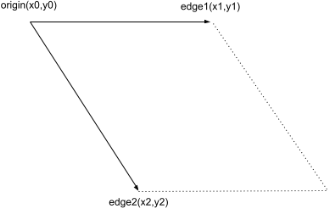
$(x_a, y_a) = Origin(Frame) + x・Edge_1(Frame) + y・Edge_2(Frame)$ = $(x_0, y_0) + s_x(x_1, y_1) + s_y(x_2, y_2$)

$$
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
=
\left[\begin{array}{c}
    x_0 \\
    y_0
\end{array}\right]
+
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
s_x
+
\left[\begin{array}{c}
    x_2 \\
    y_2
\end{array}\right]
s_y
$$


In [7]:
def frame_coord_map(frame):
    def _lambda(v):
        return add_vect(origin_frame(frame),
                     add_vect(scale_vect(xcor_vect(v), edge1_frame(frame)),
                              scale_vect(ycor_vect(v), edge2_frame(frame))))
    return _lambda

### Constructor, Selector, Painter of segment
$$
\mathrm{MakeSegment}(start, end) =
\mathrm{MakeSegment}(MakeVect(x_1,y_1),MakeVect(x_2,y_2))
$$

In [8]:
def make_segment(start, end): return (start, end)
def start_segment(seg): return seg[0]
def end_segment(seg): return seg[1]

def segments_painter(segment_list):
    def _lambda(frame):
        m = frame_coord_map(frame)
        for segment in segment_list:
            draw_line(m(start_segment(segment)), m(end_segment(segment)))
    return _lambda

### Line segment data

In [9]:
def wave():
    segments = (
        make_segment(make_vect(0.35, 0.15) ,make_vect(0.4, 0)),
        make_segment(make_vect(0.65, 0.15) ,make_vect(0.6, 0)),
        make_segment(make_vect(0.35, 0.15) ,make_vect(0.4, 0.35)),
        make_segment(make_vect(0.65, 0.15) ,make_vect(0.6, 0.35)),
        make_segment(make_vect(0.6, 0.35)  ,make_vect(0.75, 0.35)),
        make_segment(make_vect(0.4, 0.35)  ,make_vect(0.3, 0.35)),
        make_segment(make_vect(0.75, 0.35) ,make_vect(1, 0.65)),
        make_segment(make_vect(0.6, 0.55)  ,make_vect(1, 0.85)),
        make_segment(make_vect(0.6, 0.55)  ,make_vect(0.75, 1)),
        make_segment(make_vect(0.5, 0.7)   ,make_vect(0.6, 1)),
        make_segment(make_vect(0.3, 0.35)  ,make_vect(0.15, 0.4)),
        make_segment(make_vect(0.3, 0.4)   ,make_vect(0.15, 0.6)),
        make_segment(make_vect(0.15, 0.4)  ,make_vect(0, 0.15)),
        make_segment(make_vect(0.15, 0.6)  ,make_vect(0, 0.35)),
        make_segment(make_vect(0.3, 0.4)   ,make_vect(0.35, 0.5)),
        make_segment(make_vect(0.35, 0.5)  ,make_vect(0.25, 1)),
        make_segment(make_vect(0.5, 0.7)   ,make_vect(0.4, 1)),)
    return segments_painter(segments)

frame = make_frame(make_vect(0, 0),make_vect(1, 0),make_vect(0, 1))

### construct how to transform a frame and produces a new painter. 

In [10]:
def transform_painter(painter, origin, corner1, corner2):
    def _lambda(frame):
        m = frame_coord_map(frame)
        new_origin = m(origin)
        return painter(make_frame(new_origin,
                                  sub_vect(m(corner1),new_origin),
                                  sub_vect(m(corner2),new_origin)))
    return _lambda

### Painter application
#### Here's how to painter images
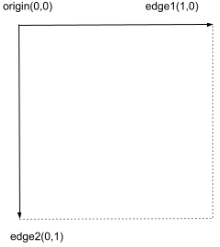

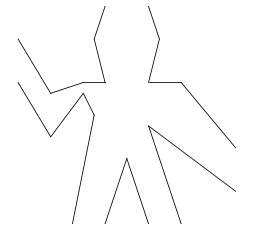

In [11]:
def source(painter):
      return transform_painter(painter,
                               make_vect(0.0, 0.0),
                               make_vect(1.0, 0.0),
                               make_vect(0.0, 1.0))
draw_init()
source(wave())(frame)

#### Here's how to flip painter images  horizontally
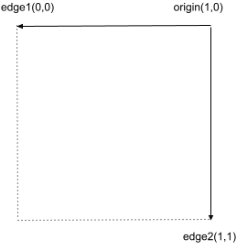

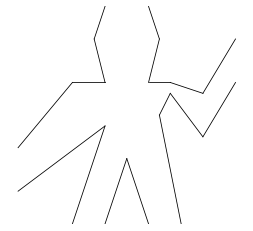

In [12]:
def flip_horiz(painter):
      return transform_painter(painter,
                               make_vect(1.0, 0.0),
                               make_vect(0.0, 0.0),
                               make_vect(1.0, 1.0))
draw_init()
flip_horiz(wave())(frame)

#### Here's how to flip painter images vertically
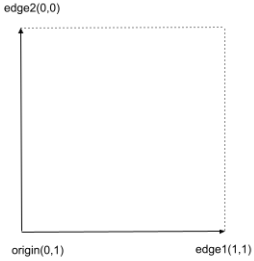

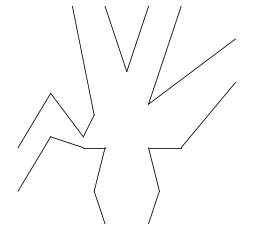

In [13]:
def flip_vert(painter):
      return transform_painter(painter,
                               make_vect(0.0, 1.0),
                               make_vect(1.0, 1.0),
                               make_vect(0.0, 0.0))
draw_init()
flip_vert(wave())(frame)

#### squash images towards the center of the frame
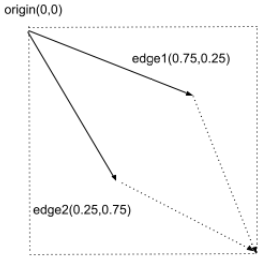

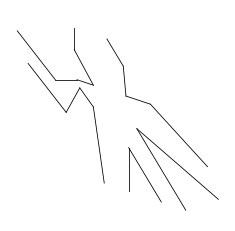

In [14]:
draw_init()
transform_painter(wave(),
                   make_vect(0.0, 0.0),
                   make_vect(0.75, 0.25),
                   make_vect(0.25, 0.75))(frame)

#### transformations rotate images counterclockwise by 90 degrees

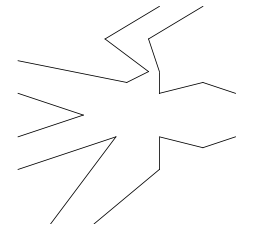

In [15]:
def rotate90(painter):
      return transform_painter(painter,
                               make_vect(1.0, 0.0),
                               make_vect(1.0, 1.0),
                               make_vect(0.0, 0.0))
draw_init()
rotate90(wave())(frame)

#### transformations rotate images counterclockwise by 270 degrees

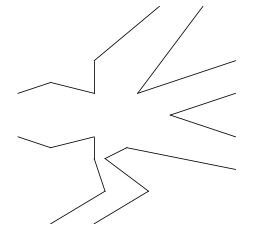

In [16]:
def rotate270(painter):
      return transform_painter(painter,
                               make_vect(0.0, 1.0),
                               make_vect(0.0, 0.0),
                               make_vect(1.0, 1.0))
draw_init()
rotate270(wave())(frame)

#### we can define a painter that shrinks its image to the upper-right quarter of the frame it is given

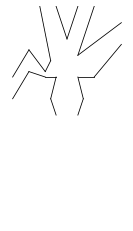

In [17]:
def shrink_to_upper_right(painter):
      return transform_painter(painter,
                               make_vect(0.5, 0.5),
                               make_vect(1.0, 0.5),
                               make_vect(0.5, 0.0))
draw_init()
shrink_to_upper_right(wave())(frame)

### Painter combination

#### The beside procedure, for example, takes two painters, transforms them to paint in the left and right halves of an argument frame respectively, and produces a new, compound painter.

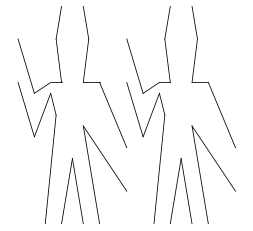

In [18]:
def beside(painter1, painter2):
    split_point = make_vect(0.5, 0.0)
    paint_left = transform_painter(painter1,
                                   make_vect(0.0, 0.0),
                                   split_point,
                                   make_vect(0.0, 1.0))
    paint_right = transform_painter(painter2,
                                    split_point,
                                    make_vect(1.0, 0.0),
                                    make_vect(0.5, 1.0))
    def _lambda(frame):
        paint_left(frame)
        paint_right(frame)

    return _lambda

draw_init()
beside(wave(),wave())(frame)

#### Below takes two painters as arguments. The resulting painter, given a frame, draws with the first painter in the bottom of the frame and with the second painter in the top. 

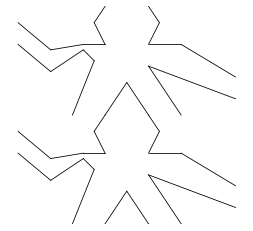

In [19]:
def below(painter1, painter2): 
    return rotate90(beside(rotate270(painter1), rotate270(painter2)))

draw_init()
below(wave(),wave())(frame)

#### Split the image downwards

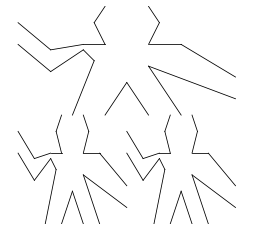

In [20]:
def up_split(painter, n):
    if n == 0:
        return painter
    else:
        smaller = up_split(painter, n - 1)
        return below(painter, beside(smaller, smaller))

draw_init()
up_split(wave(),1)(frame)

#### Split the image to the right

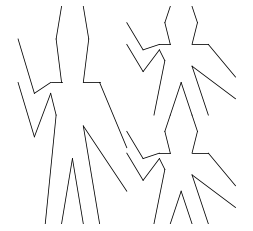

In [21]:
def right_split(painter, n):
    if n == 0:
        return painter
    else:
        smaller = right_split(painter, n - 1)
        return beside(painter, below(smaller, smaller))

draw_init()
right_split(wave(),1)(frame)

#### Split the image upwards and to the right

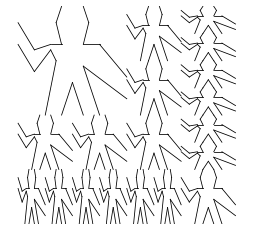

In [22]:
def corner_split(painter, n):
    if n == 0:
        return painter
    else:
        up = up_split(painter, n - 1)
        right = right_split(painter, n - 1)
        top_left = beside(up, up)
        bottom_right = below(right, right)
        corner = corner_split(painter, n - 1)

        return beside(below(painter, top_left),
                    below(bottom_right, corner))
draw_init()
corner_split(wave(),2)(frame)

#### Draw the image created by corner_split in the square pattern

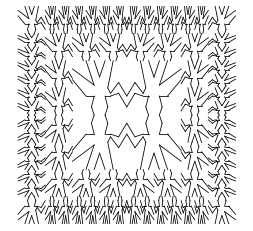

In [23]:
def square_limit(painter, n):
    quarter = corner_split(painter, n)
    half = beside(flip_horiz(quarter), quarter)
    return below(flip_vert(half), half)

draw_init()
square_limit(wave(),2)(frame)

### Koch curve

##### a. Line segment [(x0, y0), (x1, y1)] divided into 1: 2
$$
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
=
\left[\begin{array}{c}
    (x_0・2) + x_1 \\
    (y_0・2) + y_1
\end{array}\right]
・\frac{1}{3}
$$

##### b. Line segment [(x0, y0), (x1, y1)] divided into 2: 1
$$
\left[\begin{array}{c}
    x_b \\
    y_b
\end{array}\right]
=
\left[\begin{array}{c}
    (x_1・2) + x_0 \\
    (y_1・2) + y_0
\end{array}\right]
・\frac{1}{3}
$$

#####  c.Rotate 60 degrees from a and b
$$
\left[\begin{array}{c}
    x_c \\
    y_c
\end{array}\right]
=
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
+
\left[\begin{array}{c}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
\end{array}\right]
\left[\begin{array}{c}
    (x_b - x_a) \\
    (y_b - y_a)
\end{array}\right]
$$


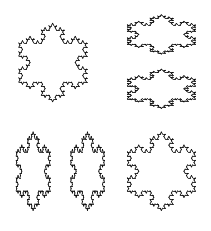

In [24]:
def koch(n):
    def _lambda(frame):
        cs = cos((pi * 60) / 180)
        sn = sin((pi * 60) / 180)
        m =  frame_coord_map(frame)

        def koch_iter(v0, v1, c):
            if c > 1:
                va = scale_vect(1/3, add_vect(scale_vect(2, v0), v1))
                vb = scale_vect(1/3, add_vect(scale_vect(2, v1), v0))
                vc = frame_coord_map(make_frame(va, make_vect(cs,sn),make_vect(-sn,cs)))(sub_vect(vb,va))

                koch_iter(v0, va, c - 1)
                koch_iter(va, vc, c - 1)
                koch_iter(vc, vb, c - 1)
                koch_iter(vb, v1, c - 1)
            else:
                draw_line(m(v0), m(v1))

        koch_iter(make_vect(0.35902777777777783, 0.15636550712410902), 
                  make_vect(0.04722222222222222, 0.6964285714285714), n)
        koch_iter(make_vect(0.04722222222222222, 0.6964285714285714), 
                  make_vect(0.6708333333333333, 0.6964285714285714), n)
        koch_iter(make_vect(0.6708333333333333, 0.6964285714285714), 
                  make_vect(0.35902777777777783, 0.15636550712410902), n)
    return _lambda

draw_init()
corner_split(koch(4),1)(frame)

### Koch curve

#####  Rotate to the right
$$
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
=
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
+
\left[\begin{array}{c}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
\end{array}\right]
\left[\begin{array}{c}
    (x_1 - x_0) \\
    (y_1 - y_0) 
\end{array}\right]
$$
##### Rotate to the left
$$
\left[\begin{array}{c}
    x_b \\
    y_b
\end{array}\right]
=
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
+
\left[\begin{array}{c}
    \cos (-\theta) & -\sin (-\theta) \\
    \sin (-\theta) & \cos (-\theta)
\end{array}\right]
\left[\begin{array}{c}
    (x_1 - x_0) \\
    (y_1 - y_0) 
\end{array}\right]
=
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
+
\left[\begin{array}{c}
    \cos \theta & \sin \theta \\
    -\sin \theta & \cos \theta
\end{array}\right]
\left[\begin{array}{c}
    (x_1 - x_0) \\
    (y_1 - y_0) 
\end{array}\right]
$$


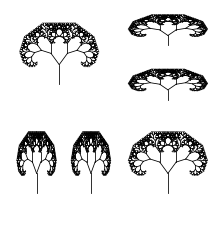

In [25]:
def tree(n):
    def _lambda(frame):
        cs = cos((pi * 15) / 180)
        sn = sin((pi * 45) / 180)
        alpha = 0.6
        m = frame_coord_map(frame)
        
        def tree_iter(v0, v1, c):
            vs = scale_vect(alpha, sub_vect(v1,v0))

            va = frame_coord_map(make_frame(v1, make_vect(cs,sn), make_vect(-sn,cs)))(vs)
            vb = frame_coord_map(make_frame(v1, make_vect(cs,-sn), make_vect(sn,cs)))(vs)
                                                                                                           
            draw_line(m(v0), m(v1))
            if  0 >= c:
                draw_line(m(v1), m(va))
                draw_line(m(v1), m(vb))
            else:
                tree_iter(v1, va, c - 1)
                tree_iter(v1, vb, c - 1)
        tree_iter(make_vect(0.4166666666666667, 0.7142857142857143), 
                  make_vect(0.4166666666666667, 0.5357142857142857), n)
    return _lambda

draw_init()
corner_split(tree(8),1)(frame)

### Sierpinski gasket

##### a.Find the coordinates to divide the line segment [(x0, y0), (x1, y1)]
$$
\left[\begin{array}{c}
    xx_0 \\
    yy_0
\end{array}\right]
=
\left[\begin{array}{c}
    x_0  + x_1 \\
    y_0  + y_1
\end{array}\right]
・
\frac{1}{2}
$$

##### b. Find the coordinates to divide the line segment [(x1, y1), (x2, y2)]
$$
\left[\begin{array}{c}
    xx_1 \\
    yy_1
\end{array}\right]
=
\left[\begin{array}{c}
    x_1  + x_2 \\
    y_1  + y_2
\end{array}\right]
・
\frac{1}{2}
$$

##### c. Find the coordinates to divide the line segment [(x2, y2), (x0, y0)]
$$
\left[\begin{array}{c}
    xx_2 \\
    yy_2
\end{array}\right]
=
\left[\begin{array}{c}
    x_2  + x_0 \\
    y_2  + y_0
\end{array}\right]
・
\frac{1}{2}
$$



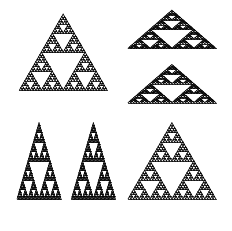

In [26]:
def sierpinski(n):
    def _lambda(frame):
        m =  frame_coord_map(frame)

        def sierpinski_iter(v0, v1, v2, c):
            if c > 1:
                vv0 = scale_vect(1/2, add_vect(v0, v1))
                vv1 = scale_vect(1/2, add_vect(v1, v2))
                vv2 = scale_vect(1/2, add_vect(v2, v0))

                sierpinski_iter(v0, vv0, vv2, c-1)
                sierpinski_iter(v1, vv0, vv1, c-1)
                sierpinski_iter(v2, vv2, vv1, c-1)
            else:
                draw_line(m(v0), m(v1))
                draw_line(m(v1), m(v2))
                draw_line(m(v2), m(v0))        
        sierpinski_iter(
                     make_vect(0.44428969359331477, 0.07168458781362007),
                     make_vect(0.04178272980501393, 0.7706093189964157),
                     make_vect(0.8481894150417827, 0.7706093189964157), n)
    return _lambda

draw_init()
corner_split(sierpinski(6),1)(frame)